In [1]:
import cv2
import numpy as np
import tqdm
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
# unexpress the dataset
def unpickle(file):
    with open(file, 'rb') as fr:
        res = pickle.load(fr, encoding='latin1')
    return res

In [3]:
def save_images(data_base, X, phase, fine_label_names):
    assert phase in ['train', 'test']
    save_img_dir = os.path.join(data_base, phase, 'images')
    os.makedirs(save_img_dir, exist_ok=True)
    img_list = []
    pbar = tqdm.tqdm(total=X['data'].shape[0])
    for i in range(X['data'].shape[0]):
        pbar.update(1)
        img = X['data'][i].reshape((3, 32, 32))
        img = img.transpose(1, 2, 0)
        img_name = "{:05d}_{}_{}.jpg".format(i, X['fine_labels'][i], fine_label_names[X['fine_labels'][i]])
        pbar.set_description(img_name)
        img_list.append(img_name)
        img_path = os.path.join(save_img_dir, img_name)
        cv2.imwrite(img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    with open(os.path.join(data_base, phase, 'image.list'), 'w') as f:
        for img_name in img_list:
            f.write('{}\n'.format(img_name))

In [4]:
data_base = "/data/Images/cifar100/source"
source_dir = os.path.join(data_base, 'cifar-100-python')
train_dir = os.path.join(data_base, 'train')
test_dir = os.path.join(data_base, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [5]:
meta_name = os.path.join(source_dir, 'meta') 
meta_dict = unpickle(meta_name)
coarse_label_names = meta_dict['coarse_label_names']
fine_label_names = meta_dict['fine_label_names']

In [6]:
print(len(coarse_label_names))

20


In [7]:
print(len(fine_label_names))

100


## Save cifar100 train images

In [8]:
train_data = os.path.join(source_dir, 'train')
X = unpickle(train_data)

In [9]:
X.keys()

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])

In [10]:
fine_label_names[X['fine_labels'][0]]

'cattle'

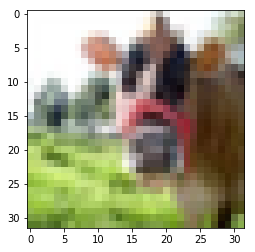

In [11]:
img = X['data'][0].reshape((3, 32, 32))
img = img.transpose(1, 2, 0)
plt.imshow(img)

In [12]:
save_images(data_base, X, 'train', fine_label_names)

In [13]:
img_list = np.loadtxt('/data/Images/cifar100/source/train/image.list', dtype=np.str)

In [14]:
img_list.shape

(50000,)

In [16]:
img_list[:50]

array(['00000_19_cattle.jpg', '00001_29_dinosaur.jpg',
       '00002_0_apple.jpg', '00003_11_boy.jpg',
       '00004_1_aquarium_fish.jpg', '00005_86_telephone.jpg',
       '00006_90_train.jpg', '00007_28_cup.jpg', '00008_23_cloud.jpg',
       '00009_31_elephant.jpg', '00010_39_keyboard.jpg',
       '00011_96_willow_tree.jpg', '00012_82_sunflower.jpg',
       '00013_17_castle.jpg', '00014_71_sea.jpg', '00015_39_keyboard.jpg',
       '00016_8_bicycle.jpg', '00017_97_wolf.jpg',
       '00018_80_squirrel.jpg', '00019_71_sea.jpg', '00020_74_shrew.jpg',
       '00021_59_pine_tree.jpg', '00022_70_rose.jpg',
       '00023_87_television.jpg', '00024_59_pine_tree.jpg',
       '00025_84_table.jpg', '00026_64_possum.jpg',
       '00027_52_oak_tree.jpg', '00028_42_leopard.jpg',
       '00029_64_possum.jpg', '00030_8_bicycle.jpg',
       '00031_17_castle.jpg', '00032_47_maple_tree.jpg',
       '00033_65_rabbit.jpg', '00034_21_chimpanzee.jpg',
       '00035_22_clock.jpg', '00036_81_streetcar.jpg', '0

## Save cifar100 test images

In [17]:
test_data = os.path.join(source_dir, 'test')
Y = unpickle(test_data)

In [18]:
Y.keys()

dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])

In [19]:
fine_label_names[Y['fine_labels'][0]]

'mountain'

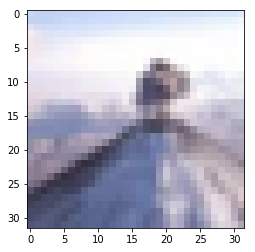

In [20]:
img = Y['data'][0].reshape((3, 32, 32))
img = img.transpose(1, 2, 0)
plt.imshow(img)

In [21]:
save_images(data_base, Y, 'test', fine_label_names)